In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import os

%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

/tmp/ipython-input-1387014147.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [ ]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_df = load_housing_data()

In [ ]:
housing_df = housing_df[['longitude' , 'latitude' , 'median_income']]

## Clustering the data with 5 cluster K Means


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_df_scaled = scaler.fit_transform(housing_df)
housing_df_scaled = pd.DataFrame(housing_df_scaled, columns=housing_df.columns)

display(housing_df_scaled.head())

longitude  latitude  median_income
0  -1.327835  1.052548       2.344766
1  -1.322844  1.043185       2.332238
2  -1.332827  1.038503       1.782699
3  -1.337818  1.038503       0.932968
4  -1.337818  1.038503      -0.012881

In [ ]:
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=4)
kmodel.fit(housing_df_scaled)

KMeans(n_clusters=4)

In [ ]:

kmodel.predict(housing_df)

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
kmodel.inertia_

14547.867182130973

## Analysing the data per cluster


In [ ]:
cluster_df = housing_df.copy()
cluster_df['cluster'] = kmodel.predict(housing_df)
cluster_df.head()

longitude  latitude  median_income  cluster
0    -122.23     37.88         8.3252        4
1    -122.22     37.86         8.3014        4
2    -122.24     37.85         7.2574        4
3    -122.25     37.85         5.6431        4
4    -122.25     37.85         3.8462        2

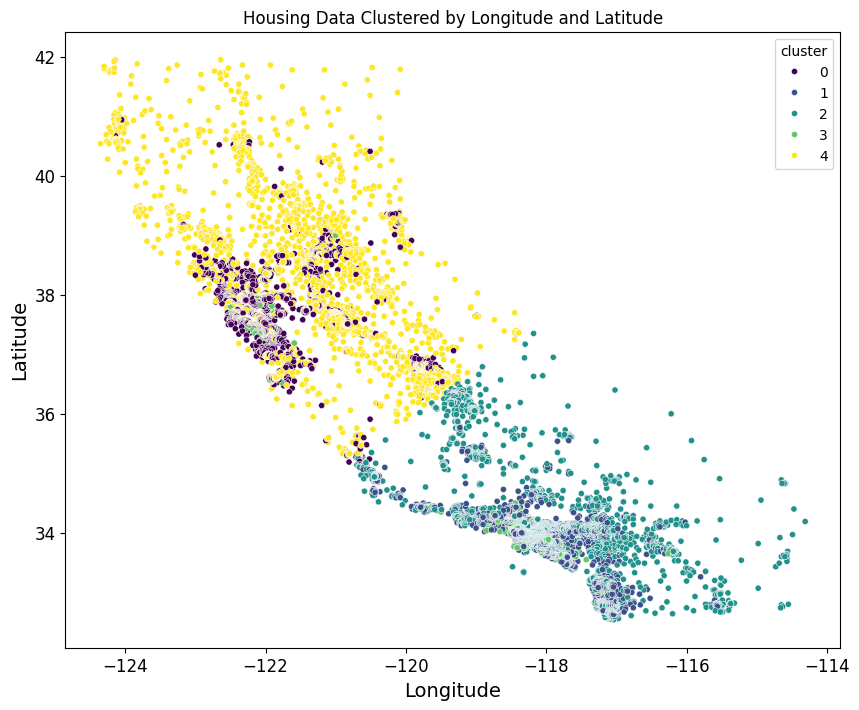

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df, x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data Clustered by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

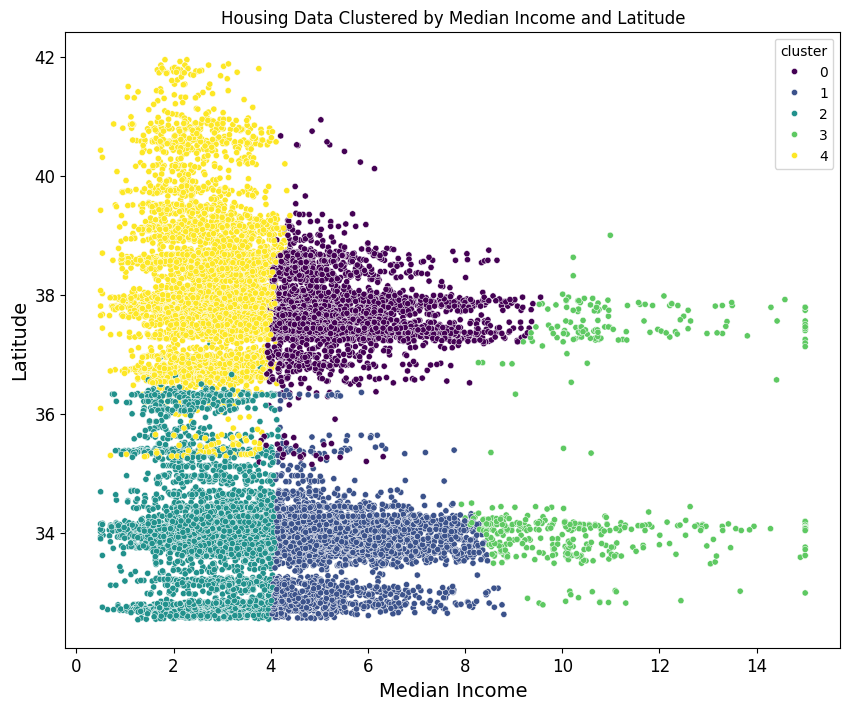

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df, x='median_income', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data Clustered by Median Income and Latitude')
plt.xlabel('Median Income')
plt.ylabel('Latitude')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Select longitude and latitude columns
X = cluster_df[['longitude', 'latitude']]

# Apply PCA to reduce to 1 dimension
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Add the PCA results as a new column to the DataFrame
cluster_df['longitude_latitude_pca'] = X_pca

cluster_df.head()

longitude  latitude  median_income  cluster  longitude_latitude_pca
0    -122.23     37.88         8.3252        0                3.458638
1    -122.22     37.86         8.3014        0                3.437193
2    -122.24     37.85         7.2574        0                3.443526
3    -122.25     37.85         5.6431        0                3.450349
4    -122.25     37.85         3.8462        4                3.450349

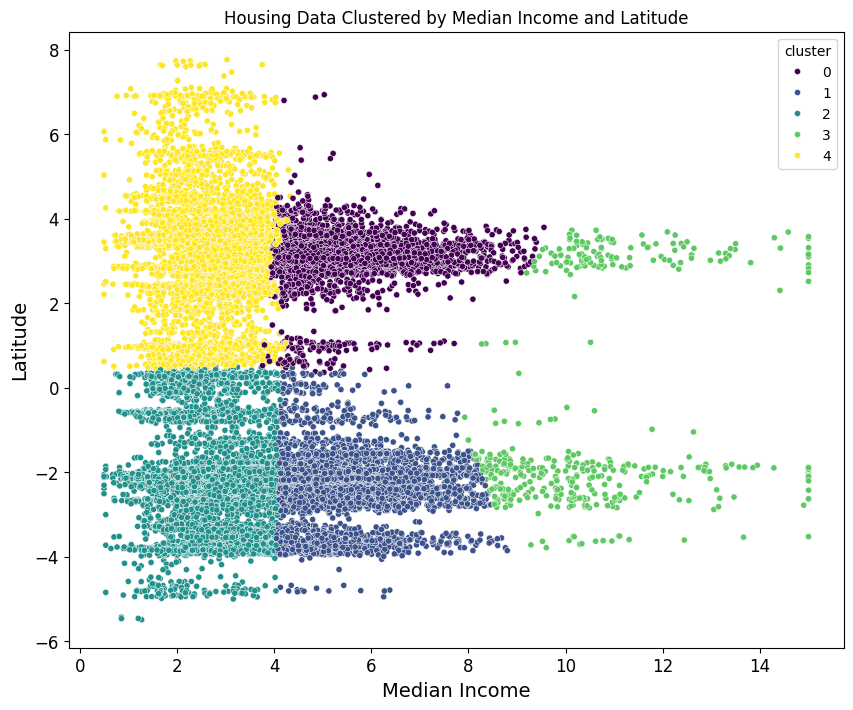

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df, x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data Clustered by Median Income and Latitude')
plt.xlabel('Median Income')
plt.ylabel('Latitude')
plt.show()

<Axes: >

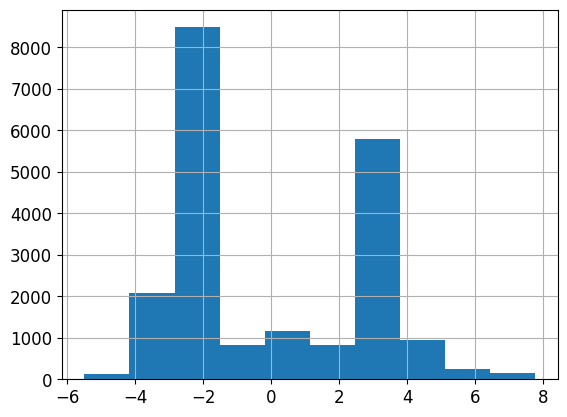

In [ ]:
cluster_df['longitude_latitude_pca'].hist()

In [ ]:
pca_column = cluster_df['longitude_latitude_pca']
cluster_df[ pca_column < 0].describe()

longitude      latitude  median_income       cluster  \
count  11636.000000  11636.000000   11636.000000  11636.000000   
mean    -117.961109     33.891348       3.947125      1.669130   
std        0.694524      0.558664       1.935755      0.530477   
min     -120.480000     32.540000       0.499900      1.000000   
25%     -118.330000     33.760000       2.611850      1.000000   
50%     -118.090000     33.970000       3.607700      2.000000   
75%     -117.570000     34.120000       4.839475      2.000000   
max     -114.310000     36.950000      15.000100      3.000000   

       longitude_latitude_pca  
count            11636.000000  
mean                -2.369987  
std                  0.800120  
min                 -5.495097  
25%                 -2.640391  
50%                 -2.244537  
75%                 -1.998431  
max                 -0.001093

In [ ]:
cluster_df[ pca_column > 0].describe()

longitude     latitude  median_income      cluster  \
count  9004.000000  9004.000000    9004.000000  9004.000000   
mean   -121.648515    37.881153       3.771868     2.564749   
std       0.955298     1.039367       1.847779     1.869723   
min    -124.350000    34.700000       0.499900     0.000000   
25%    -122.270000    37.350000       2.512900     0.000000   
50%    -121.920000    37.780000       3.432900     4.000000   
75%    -121.240000    38.410000       4.637600     4.000000   
max    -118.180000    41.950000      15.000100     4.000000   

       longitude_latitude_pca  
count             9004.000000  
mean                 3.062768  
std                  1.206317  
min                  0.000862  
25%                  2.719286  
50%                  3.280011  
75%                  3.522951  
max                  7.766143

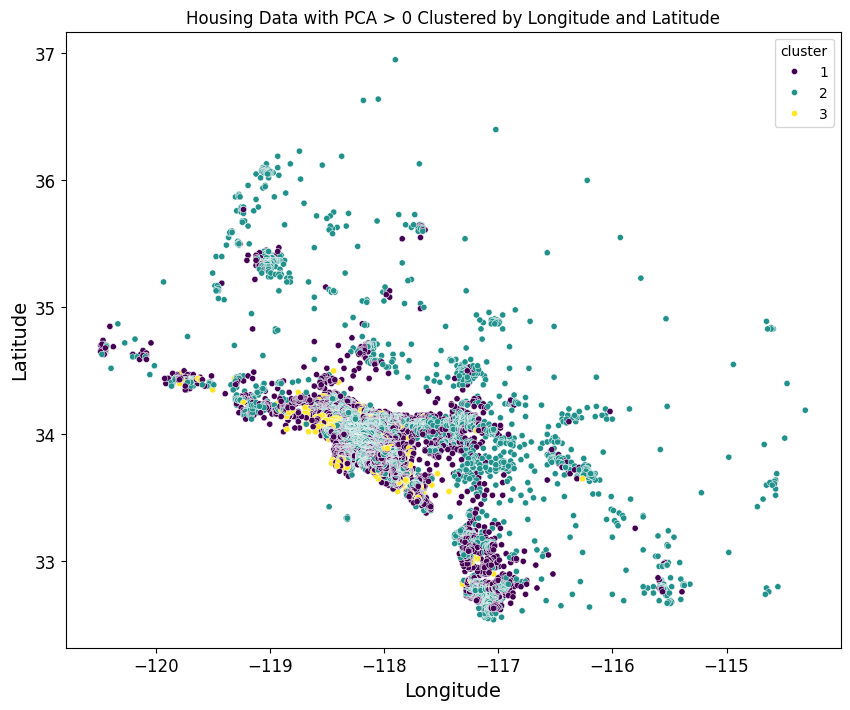

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df[cluster_df['longitude_latitude_pca'] < 0], x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data with PCA > 0 Clustered by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

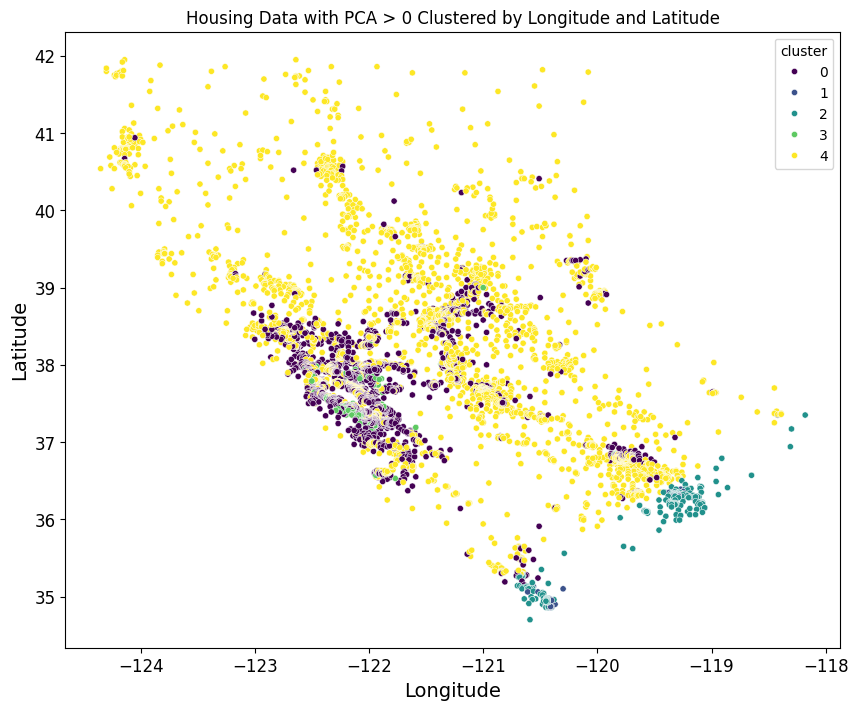

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df[cluster_df['longitude_latitude_pca'] > 0], x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data with PCA > 0 Clustered by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Finding the Optimal Cluster

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(housing_df , kmodel.labels_)

np.float64(0.42316103931962856)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k).fit(housing_df)
                for k in range(2, 7)]

In [ ]:
len(kmeans_per_k)

5

In [ ]:
sil_scores = []

for km in kmeans_per_k:
    sil_scores.append(silhouette_score(housing_df , km.labels_))

print(sil_scores)

[np.float64(0.566509491976379), np.float64(0.5134953776441159), np.float64(0.42404915748928107), np.float64(0.3750055640549919), np.float64(0.3359115646791283)]


Saving figure silhouette_analysis_plot


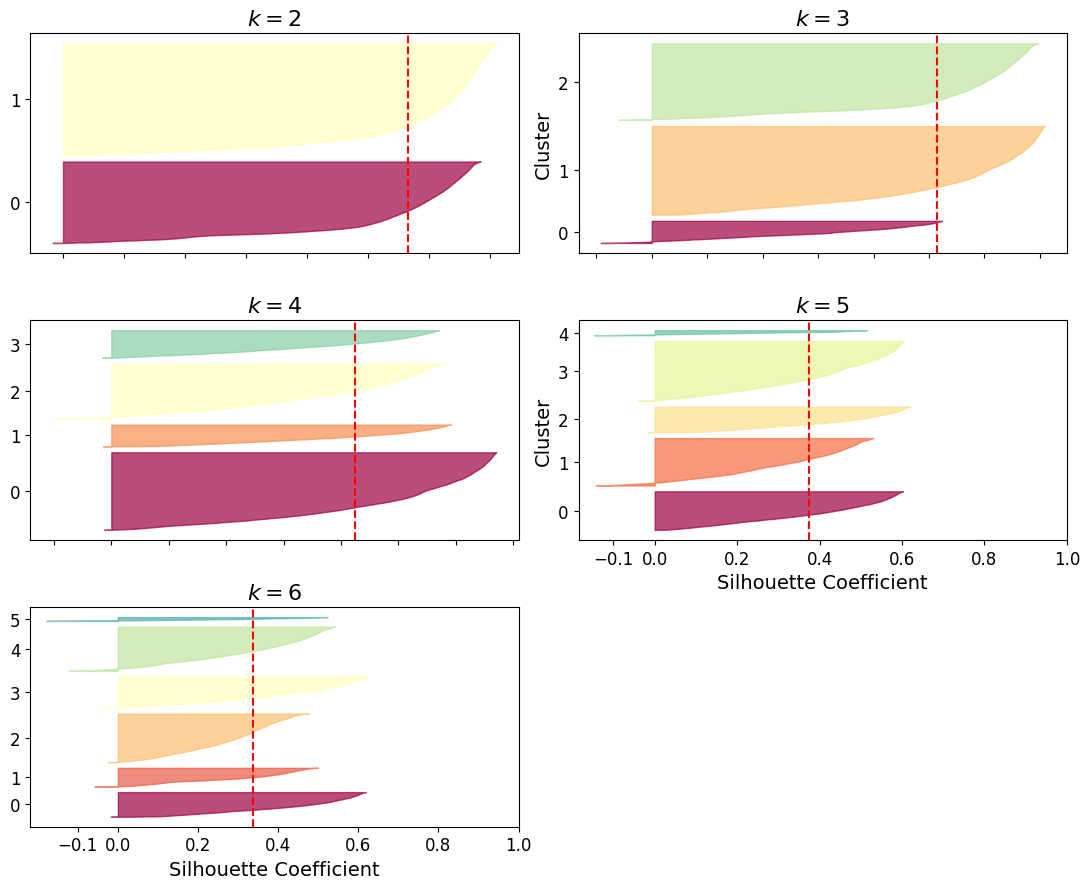

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

X = housing_df.copy()

# Change the subplot layout to 3x2 to accommodate 5 plots
for i, k in enumerate(range(2 ,7)):
    plt.subplot(3, 2, i + 1) # Adjust subplot index

    y_pred = kmeans_per_k[k-2].labels_
    silhouette_coefficients = silhouette_samples(housing_df, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()

        color = mpl.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5): # These k values are just examples, the ideal k should be chosen based on the silhouette plot
        plt.ylabel("Cluster")

    if k in (5, 6): # These k values are just examples, the ideal k should be chosen based on the silhouette plot
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=sil_scores[i], color="red", linestyle="--") # Use index i for sil_scores
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

In [ ]:
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_df_scaled = scaler.fit_transform(housing_df)
housing_df_scaled = pd.DataFrame(housing_df_scaled, columns=housing_df.columns)

display(housing_df_scaled.head())

longitude  latitude  median_income
0  -1.327835  1.052548       2.344766
1  -1.322844  1.043185       2.332238
2  -1.332827  1.038503       1.782699
3  -1.337818  1.038503       0.932968
4  -1.337818  1.038503      -0.012881

In [ ]:
final_kmodel_ = KMeans(n_clusters=2)
final_kmodel_.fit(housing_df_scaled)


KMeans(n_clusters=2)

In [ ]:
housing_df.values

array([[-122.23  ,   37.88  ,    8.3252],
       [-122.22  ,   37.86  ,    8.3014],
       [-122.24  ,   37.85  ,    7.2574],
       ...,
       [-121.22  ,   39.43  ,    1.7   ],
       [-121.32  ,   39.43  ,    1.8672],
       [-121.24  ,   39.37  ,    2.3886]])

In [ ]:
y_pred = final_kmodel_.predict(housing_df_scaled)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(X)
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plot_decision_boundaries(final_kmodel_ , housing_df.values)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: cannot reshape array of size 20640 into shape (1000,1000)

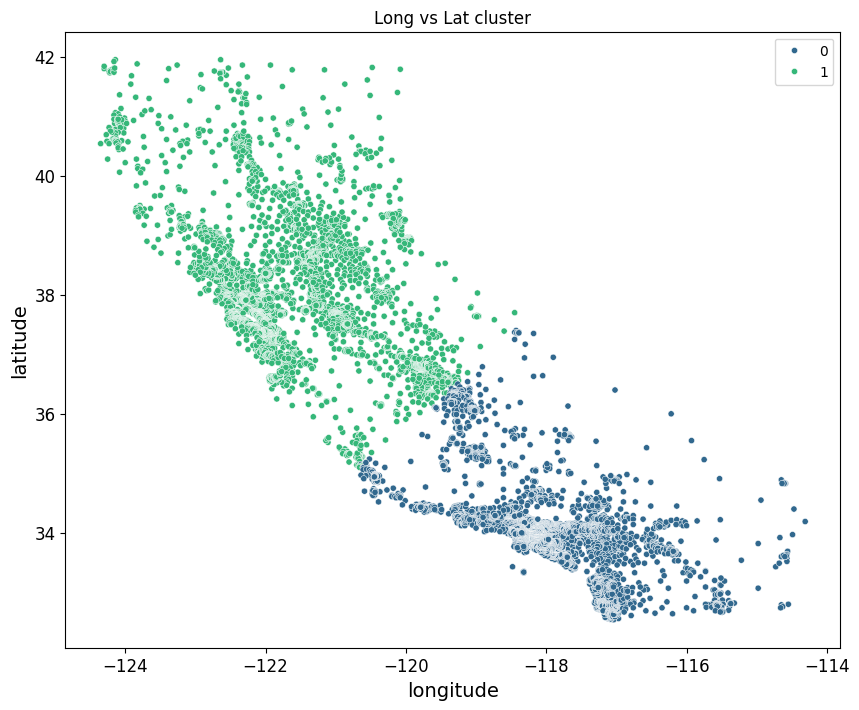

In [ ]:
def plot_scatterplot(X , cluster , x_axis , y_axis , title = None):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=X , x=x_axis, y=y_axis, hue=cluster ,  palette='viridis', s=20)
    if title:
      plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()



plot_scatterplot(housing_df , y_pred ,  'longitude' , 'latitude' , title = 'Long vs Lat cluster')


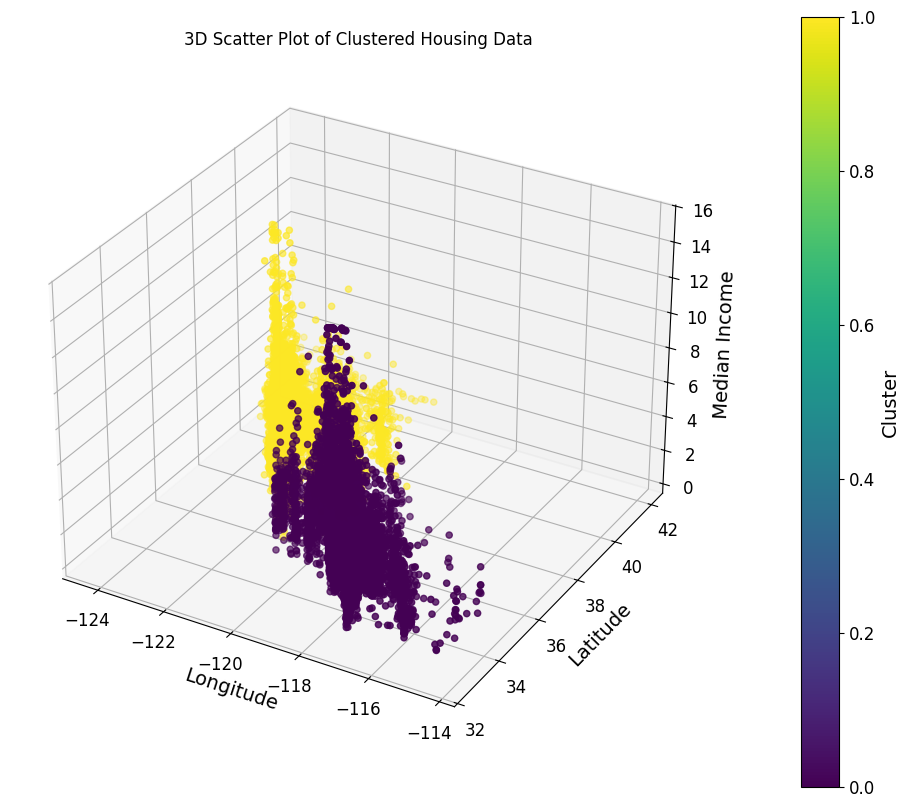

In [ ]:
# Add the cluster labels to the housing_df for plotting
housing_df_clustered = housing_df.copy()
housing_df_clustered['cluster'] = y_pred

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(housing_df_clustered['longitude'], housing_df_clustered['latitude'], housing_df_clustered['median_income'], c=housing_df_clustered['cluster'], cmap='viridis', s=20)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income')
ax.set_title('3D Scatter Plot of Clustered Housing Data')

# Add a color bar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Cluster')

plt.show()

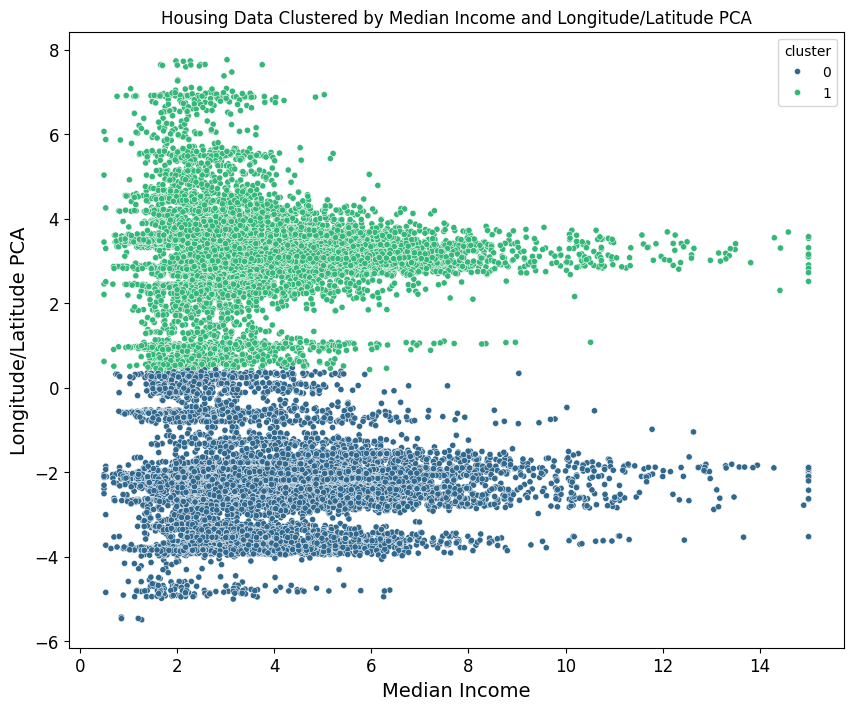

In [ ]:
# 2D Scatter Plot using PCA and Median Income
# Ensure 'longitude_latitude_pca' column exists, if not, recalculate it
if 'longitude_latitude_pca' not in housing_df_clustered.columns:
    from sklearn.decomposition import PCA
    X = housing_df_clustered[['longitude', 'latitude']]
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X)
    housing_df_clustered['longitude_latitude_pca'] = X_pca

plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing_df_clustered, x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
plt.title('Housing Data Clustered by Median Income and Longitude/Latitude PCA')
plt.xlabel('Median Income')
plt.ylabel('Longitude/Latitude PCA')
plt.show()

/tmp/ipython-input-822841642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_df_clustered, x='cluster', y='longitude', palette='viridis')


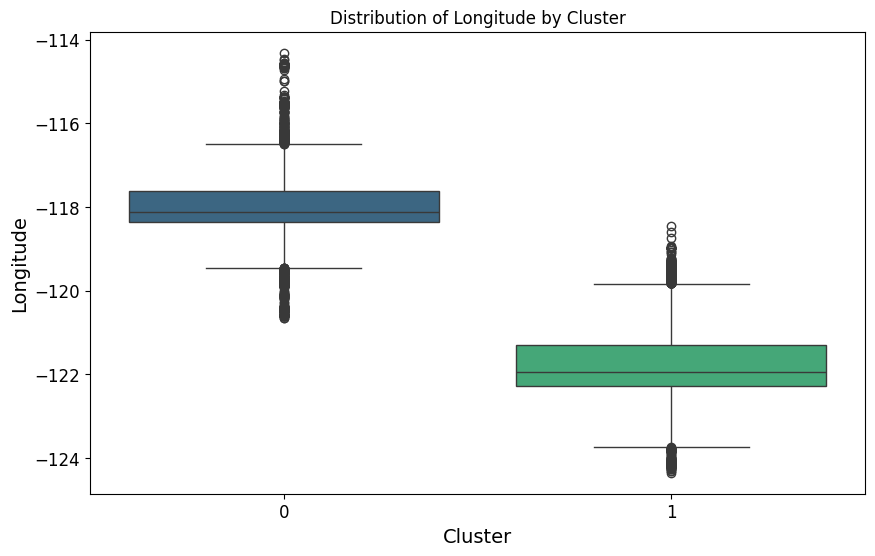

/tmp/ipython-input-822841642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_df_clustered, x='cluster', y='latitude', palette='viridis')


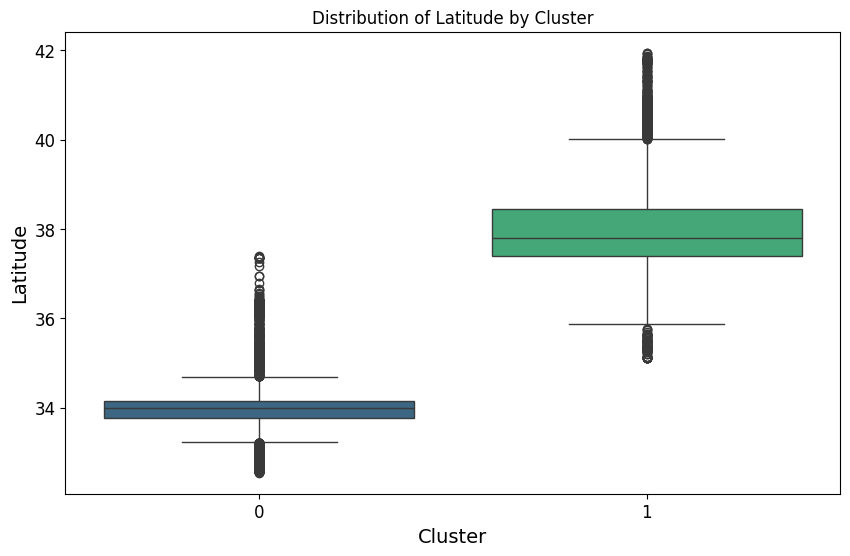

/tmp/ipython-input-822841642.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_df_clustered, x='cluster', y='median_income', palette='viridis')


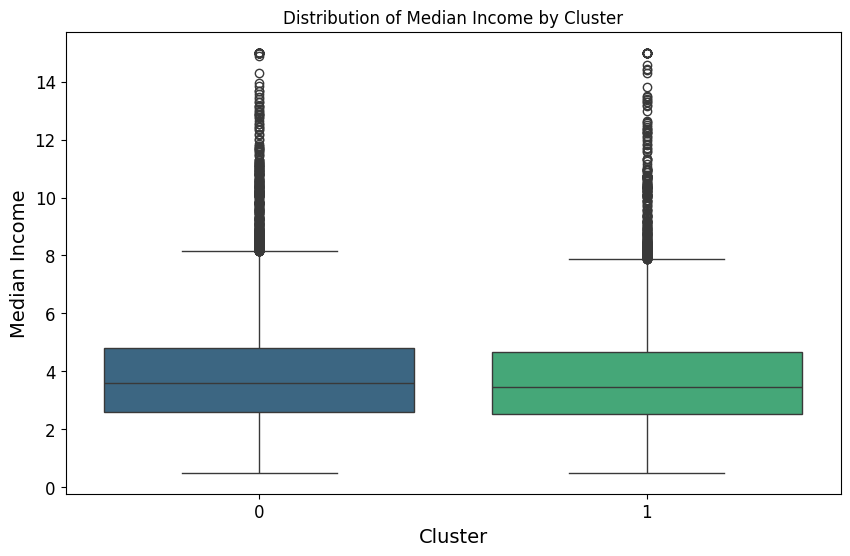

In [ ]:
# Box plot for Longitude by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_df_clustered, x='cluster', y='longitude', palette='viridis')
plt.title('Distribution of Longitude by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Longitude')
plt.show()

# Box plot for Latitude by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_df_clustered, x='cluster', y='latitude', palette='viridis')
plt.title('Distribution of Latitude by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Latitude')
plt.show()

# Box plot for Median Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_df_clustered, x='cluster', y='median_income', palette='viridis')
plt.title('Distribution of Median Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()

# Task
Perform a comparative analysis of KMeans and DBScan clustering algorithms on the housing data.

## Apply dbscan

### Subtask:
Apply the DBScan clustering algorithm to the housing data and obtain cluster labels.


**Reasoning**:
The subtask requires applying the DBSCAN algorithm to the scaled housing data. This involves importing the necessary class, instantiating the model, fitting it to the data, and extracting the cluster labels. These steps can be grouped into a single code block.



In [ ]:
from sklearn.cluster import DBSCAN

# Instantiate DBSCAN with default parameters
dbscan_model = DBSCAN()

# Fit the model to the scaled data
dbscan_model.fit(housing_df_scaled)

# Get the cluster labels
dbscan_labels = dbscan_model.labels_

# Display the first few labels
print(dbscan_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


## Evaluate dbscan

### Subtask:
Evaluate the performance of the DBScan clustering using appropriate metrics.


**Reasoning**:
Calculate and print the silhouette score for the DBSCAN clustering.



In [ ]:
silhouette_score_dbscan = silhouette_score(housing_df_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {silhouette_score_dbscan}")

DBSCAN Silhouette Score: 0.35443956672890947


## Compare results

### Subtask:
Compare the clustering results obtained from KMeans and DBScan.


**Reasoning**:
Compare the silhouette scores of KMeans and DBSCAN, identify the number of clusters for each, and summarize the differences.



In [ ]:
# 1. Compare silhouette scores
print(f"KMeans Silhouette Scores for k=2 to 6: {sil_scores}")
print(f"DBSCAN Silhouette Score: {silhouette_score_dbscan}")

best_kmeans_silhouette_score = max(sil_scores)
best_kmeans_k = sil_scores.index(best_kmeans_silhouette_score) + 2 # Add 2 because k starts from 2

print(f"Best KMeans Silhouette Score: {best_kmeans_silhouette_score} (for k={best_kmeans_k})")

# 2. Number of clusters
kmeans_num_clusters = best_kmeans_k
dbscan_num_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) # Exclude noise cluster (-1)

print(f"Number of clusters for best KMeans: {kmeans_num_clusters}")
print(f"Number of clusters for DBSCAN: {dbscan_num_clusters}")

# 3. Other apparent differences (Noise handling)
print("\nOther differences:")
print("DBSCAN identifies and labels noise points (-1), which are considered outliers that do not belong to any cluster.")
print("KMeans, on the other hand, assigns every data point to a cluster, even if it is an outlier.")

# 4. Summarize key differences and similarities
print("\nSummary of comparison:")
print(f"- KMeans achieved a higher silhouette score ({best_kmeans_silhouette_score}) compared to DBSCAN ({silhouette_score_dbscan}), suggesting better defined clusters for KMeans based on this metric.")
print(f"- The best performing KMeans model identified {kmeans_num_clusters} clusters.")
print(f"- DBSCAN identified {dbscan_num_clusters} clusters (excluding noise). The presence of noise points in DBSCAN is a key difference from KMeans.")
print("- KMeans partitions all data points into clusters, while DBSCAN can leave some points unclustered as noise.")

KMeans Silhouette Scores for k=2 to 6: [np.float64(0.566509491976379), np.float64(0.5134953776441159), np.float64(0.42404915748928107), np.float64(0.3750055640549919), np.float64(0.3359115646791283)]
DBSCAN Silhouette Score: 0.35443956672890947
Best KMeans Silhouette Score: 0.566509491976379 (for k=2)
Number of clusters for best KMeans: 2
Number of clusters for DBSCAN: 1

Other differences:
DBSCAN identifies and labels noise points (-1), which are considered outliers that do not belong to any cluster.
KMeans, on the other hand, assigns every data point to a cluster, even if it is an outlier.

Summary of comparison:
- KMeans achieved a higher silhouette score (0.566509491976379) compared to DBSCAN (0.35443956672890947), suggesting better defined clusters for KMeans based on this metric.
- The best performing KMeans model identified 2 clusters.
- DBSCAN identified 1 clusters (excluding noise). The presence of noise points in DBSCAN is a key difference from KMeans.
- KMeans partitions all

## Visualize results

### Subtask:
Visualize the clusters obtained from both algorithms for visual comparison.


**Reasoning**:
Create scatter plots for KMeans and DBSCAN clustering results using 'longitude' on the x-axis and 'latitude' on the y-axis, and also using 'median_income' on the x-axis and 'longitude_latitude_pca' on the y-axis to visualize the clusters.



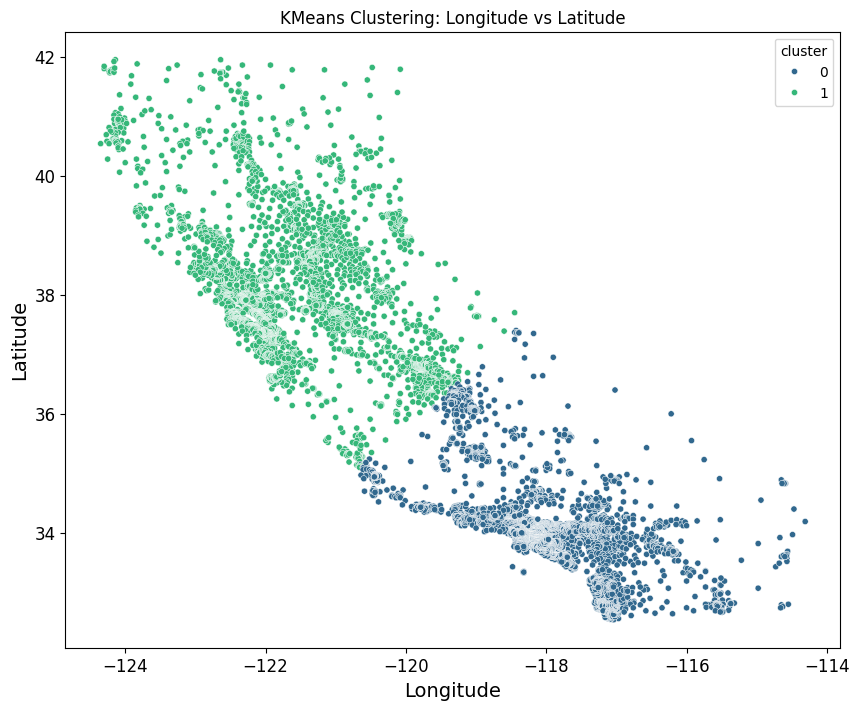

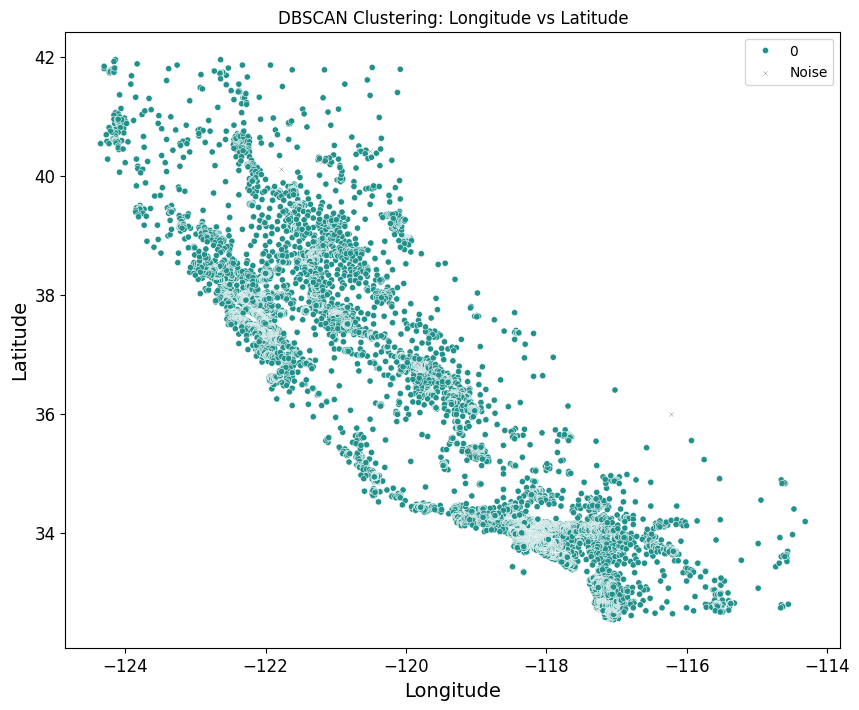

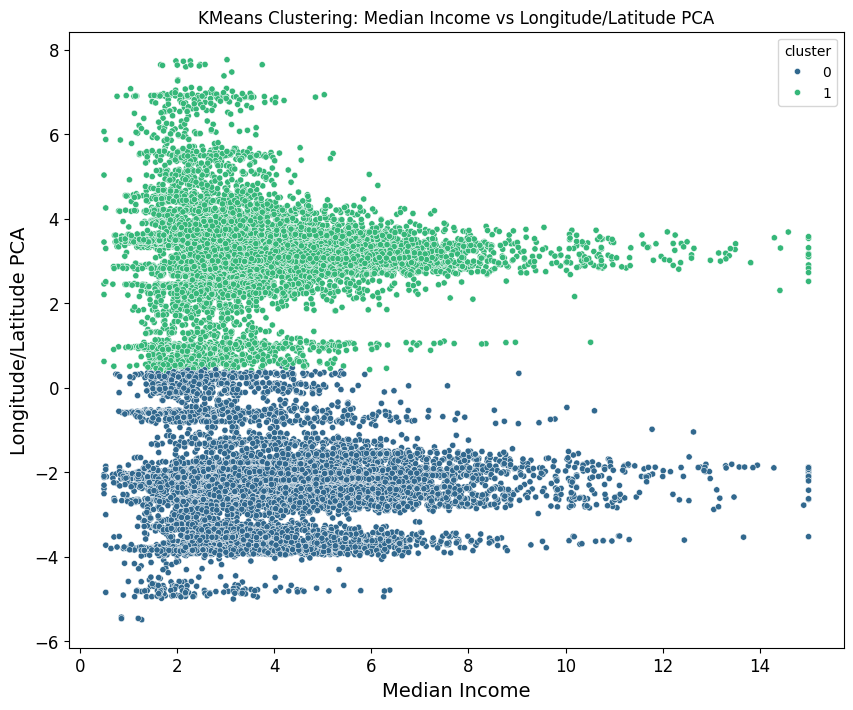

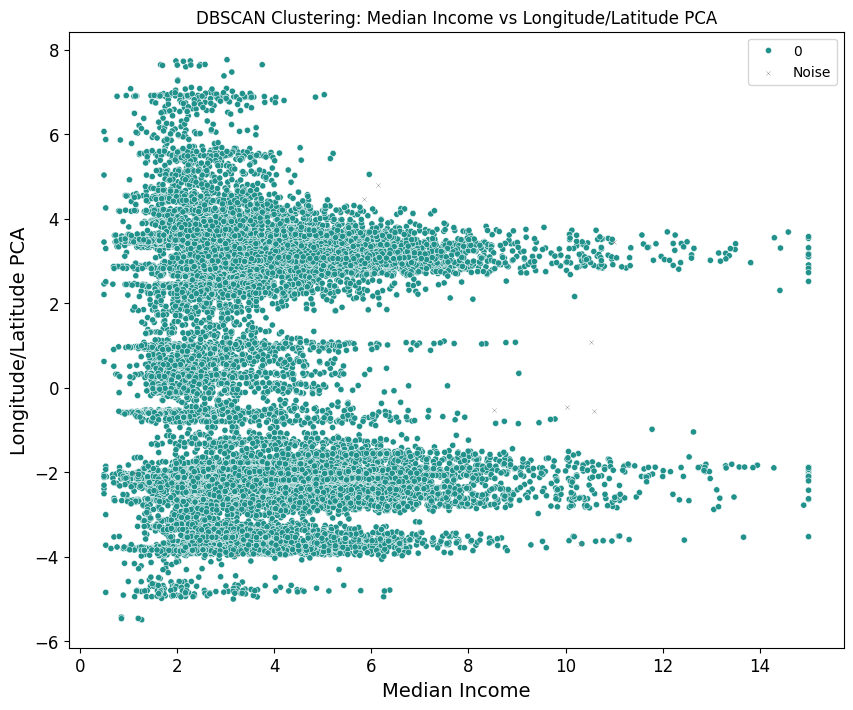

In [ ]:
# Create a DataFrame for DBSCAN results, handling noise points
dbscan_df = housing_df.copy()
dbscan_df['cluster'] = dbscan_labels

# Add the 'longitude_latitude_pca' column to dbscan_df
from sklearn.decomposition import PCA
X = dbscan_df[['longitude', 'latitude']]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
dbscan_df['longitude_latitude_pca'] = X_pca


# Visualize KMeans clusters (Longitude vs Latitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing_df_clustered, x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('KMeans Clustering: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize DBSCAN clusters (Longitude vs Latitude)
plt.figure(figsize=(10, 8))
# Color noise points (-1) differently or exclude them
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] != -1], x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
# Optionally plot noise points with a different style
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] == -1], x='longitude', y='latitude', color='gray', marker='x', s=10, label='Noise')
plt.title('DBSCAN Clustering: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize KMeans clusters (Median Income vs Longitude/Latitude PCA)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing_df_clustered, x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
plt.title('KMeans Clustering: Median Income vs Longitude/Latitude PCA')
plt.xlabel('Median Income')
plt.ylabel('Longitude/Latitude PCA')
plt.show()

# Visualize DBSCAN clusters (Median Income vs Longitude/Latitude PCA)
plt.figure(figsize=(10, 8))
# Color noise points (-1) differently or exclude them
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] != -1], x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
# Optionally plot noise points with a different style
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] == -1], x='median_income', y='longitude_latitude_pca', color='gray', marker='x', s=10, label='Noise')
plt.title('DBSCAN Clustering: Median Income vs Longitude/Latitude PCA')
plt.xlabel('Median Income')
plt.ylabel('Longitude/Latitude PCA')
plt.legend()
plt.show()

**Reasoning**:
The previous command failed because the `dbscan_df` DataFrame did not have the 'longitude_latitude_pca' column. Need to add this column to `dbscan_df` before attempting to plot with it.



/tmp/ipython-input-2742857479.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
/tmp/ipython-input-2742857479.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/tmp/ipython-input-2742857479.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

(1000000,)


/tmp/ipython-input-2742857479.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')


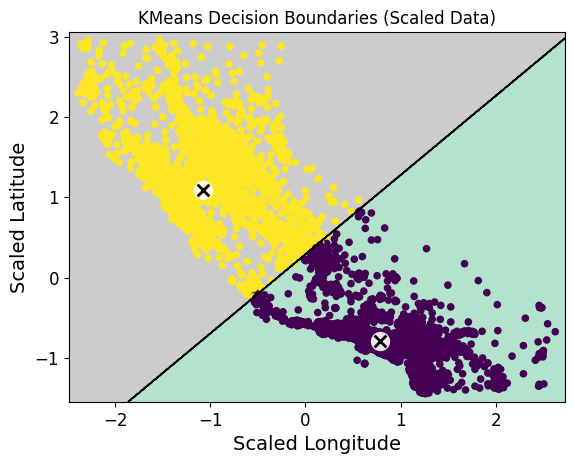

In [ ]:
# Function to plot KMeans decision boundaries
def plot_kmeans_decision_boundaries(kmeans_model, X_scaled, clustering_model = 'kmeans' , resolution=1000):
    mins = X_scaled.min(axis=0) - 0.1
    maxs = X_scaled.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    # Use only the first two features for plotting decision boundaries
    # Note: This is a simplification for visualization. The KMeans model was trained on 3 features.
    X_grid = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())] # Add a third dimension with zeros for median_income
    if clustering_model == 'kmeans':
        Z = kmeans_model.predict(X_grid)
        print(Z.shape)
    else:
        from sklearn.cluster import DBSCAN
        dbscan_model = DBSCAN()
        dbscan_model.fit(X_grid)
        Z = dbscan_model.labels_
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    # Plot the actual data points
    plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=kmeans_model.labels_, cmap='viridis', s=20)

    # Plot the centroids
    plot_centroids(kmeans_model.cluster_centers_[:, :2]) # Plot only the first two dimensions of centroids

    plt.title('KMeans Decision Boundaries (Scaled Data)')
    plt.xlabel('Scaled Longitude')
    plt.ylabel('Scaled Latitude')
    plt.show()

# Plot KMeans decision boundaries using the best KMeans model and scaled data
plot_kmeans_decision_boundaries(final_kmodel_, housing_df_scaled)

In [ ]:
plot_kmeans_decision_boundaries(dbscan_model , housing_df_scaled , clustering_model = 'dbscan')

/tmp/ipython-input-2742857479.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
/tmp/ipython-input-2742857479.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))


In [ ]:
dbscan_model.labels_.shape

(20640,)

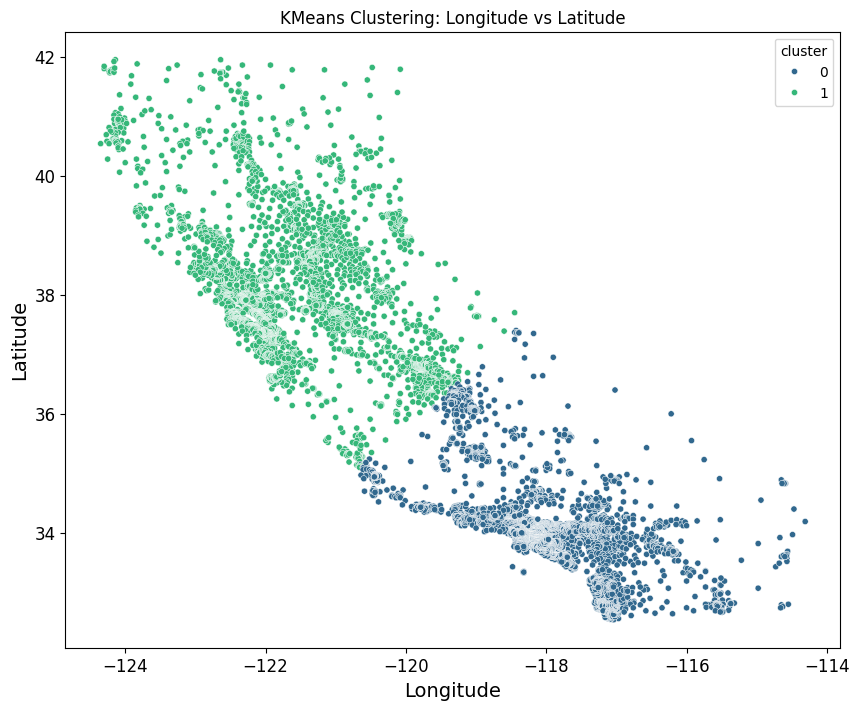

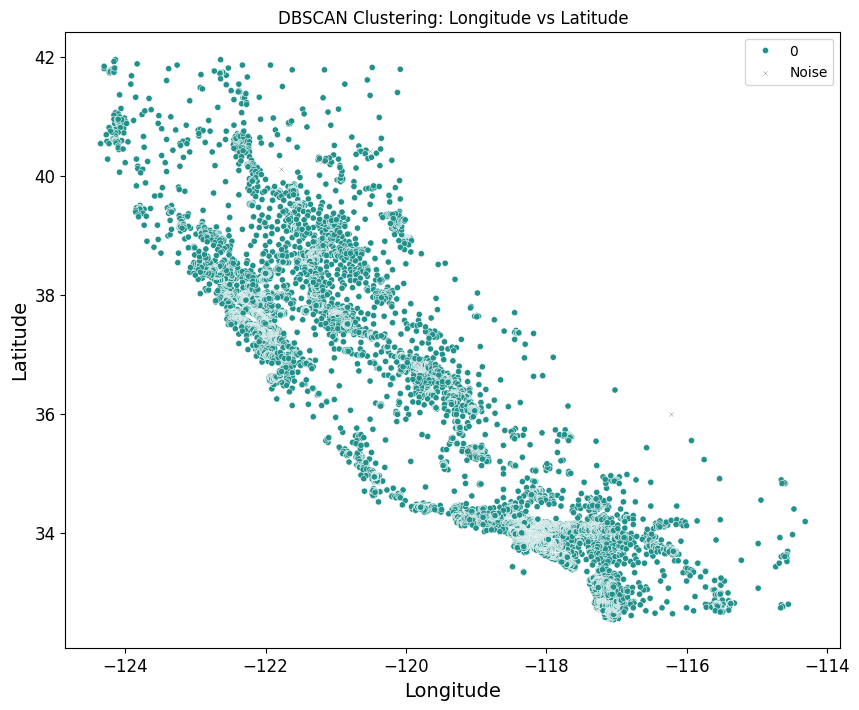

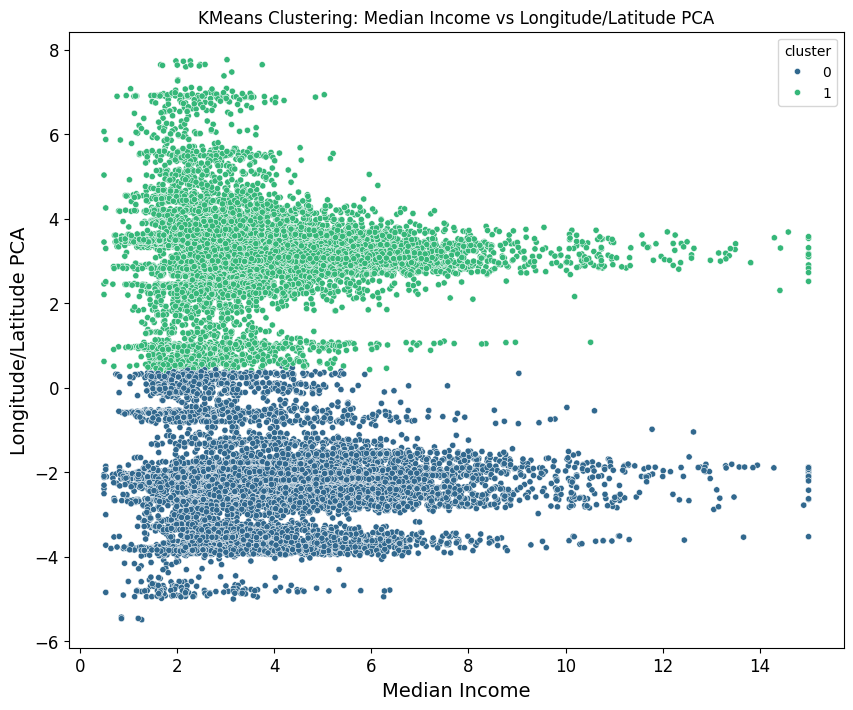

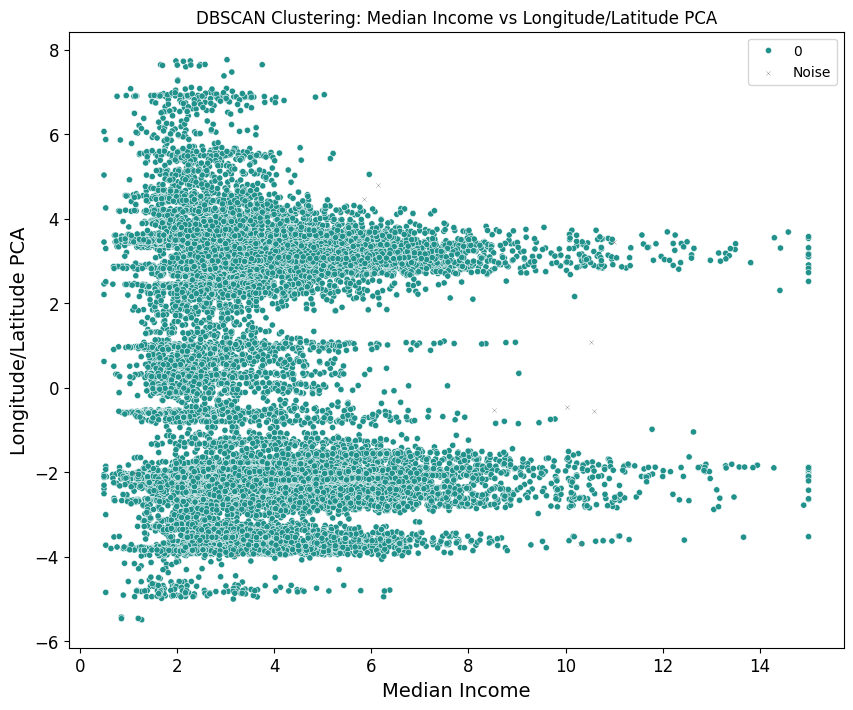

In [ ]:
# Create a DataFrame for DBSCAN results, handling noise points
dbscan_df = housing_df.copy()
dbscan_df['cluster'] = dbscan_labels

# Add the 'longitude_latitude_pca' column to dbscan_df
from sklearn.decomposition import PCA
X = dbscan_df[['longitude', 'latitude']]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
dbscan_df['longitude_latitude_pca'] = X_pca


# Visualize KMeans clusters (Longitude vs Latitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing_df_clustered, x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
plt.title('KMeans Clustering: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize DBSCAN clusters (Longitude vs Latitude)
plt.figure(figsize=(10, 8))
# Color noise points (-1) differently or exclude them
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] != -1], x='longitude', y='latitude', hue='cluster', palette='viridis', s=20)
# Optionally plot noise points with a different style
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] == -1], x='longitude', y='latitude', color='gray', marker='x', s=10, label='Noise')
plt.title('DBSCAN Clustering: Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize KMeans clusters (Median Income vs Longitude/Latitude PCA)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing_df_clustered, x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
plt.title('KMeans Clustering: Median Income vs Longitude/Latitude PCA')
plt.xlabel('Median Income')
plt.ylabel('Longitude/Latitude PCA')
plt.show()

# Visualize DBSCAN clusters (Median Income vs Longitude/Latitude PCA)
plt.figure(figsize=(10, 8))
# Color noise points (-1) differently or exclude them
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] != -1], x='median_income', y='longitude_latitude_pca', hue='cluster', palette='viridis', s=20)
# Optionally plot noise points with a different style
sns.scatterplot(data=dbscan_df[dbscan_df['cluster'] == -1], x='median_income', y='longitude_latitude_pca', color='gray', marker='x', s=10, label='Noise')
plt.title('DBSCAN Clustering: Median Income vs Longitude/Latitude PCA')
plt.xlabel('Median Income')
plt.ylabel('Longitude/Latitude PCA')
plt.legend()
plt.show()

Based on the analysis we performed:

Silhouette Scores: KMeans achieved a higher silhouette score (0.5665) with 2 clusters compared to DBSCAN (0.3544) with 1 cluster (excluding noise). This suggests that, according to the silhouette metric, the clusters found by KMeans are better defined and more separated than those found by DBSCAN on this particular dataset and with the chosen parameters.
Number of Clusters: KMeans with the highest silhouette score identified 2 clusters, while DBSCAN with default parameters identified 1 main cluster and noise points. This highlights a key difference in how the algorithms approach clustering; KMeans forces every point into a cluster, while DBSCAN can identify points that don't belong to any cluster (noise).
Noise Handling: A significant difference is DBSCAN's ability to explicitly identify noise points (labeled as -1), which KMeans does not. This is evident in the scatter plots where the gray 'x' markers represent noise points in the DBSCAN visualization.
Visual Comparison: The scatter plots show that KMeans tends to create more evenly sized and shaped clusters. DBSCAN, on the other hand, can find arbitrarily shaped clusters and is sensitive to the density of points. In our case, with default parameters, DBSCAN identified one large dense area as a cluster and marked many other points as noise.
In summary, KMeans appears to provide a more balanced partitioning of the data into a predefined number of clusters, resulting in a higher silhouette score. DBSCAN, while capable of finding density-based clusters and identifying noise, with default parameters resulted in fewer clusters and a lower silhouette score on this dataset. The choice of which algorithm is "better" depends on the specific goals of the clustering task and the nature of the data. If identifying noise is important and clusters are expected to have irregular shapes, DBSCAN might be more suitable with appropriate parameter tuning. If the goal is to partition the data into a fixed number of well-separated clusters, KMeans might be preferred.